<a href="https://colab.research.google.com/github/EHISAMGOLD/Volunteers-Data/blob/master/Simple_Netflix_data_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

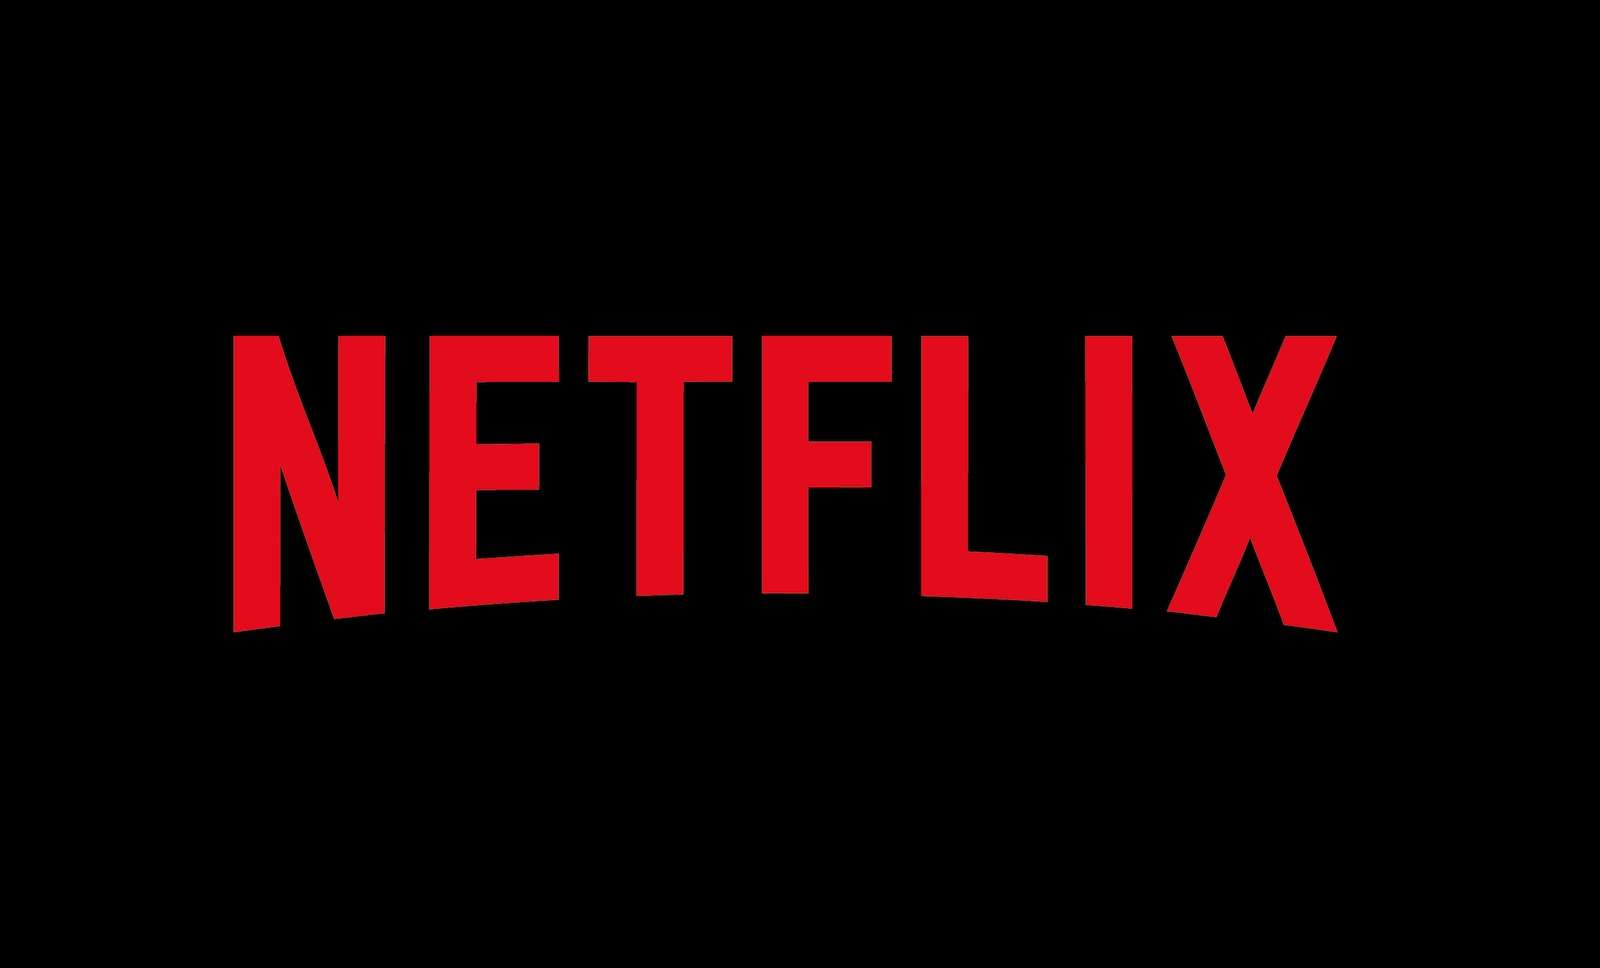

https://www.kaggle.com/datasets/shivamb/netflix-shows

- Types of content produced by Netflix
- Is Netflix more focused on TV Shows rather than movies in recent years
- What are content produced by top countries on Netflix


In [ ]:
import numpy as np
import pandas as pd

# plotting libraries
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [ ]:
df = pd.read_csv('netflix_titles.csv')

In [ ]:
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [ ]:
df.shape

(8807, 12)

## 3. Exploratory data analysis

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB


In [ ]:
df.describe()

,release_year
count,8807.000000
mean,2014.180198
std,8.819312
min,1925.000000
25%,2013.000000
50%,2017.000000
75%,2019.000000
max,2021.000000


In [ ]:
for column in df.columns:
    print(column, df[column].nunique())

show_id 8807
type 2
title 8807
director 4528
cast 7692
country 748
date_added 1767
release_year 74
rating 17
duration 220
listed_in 514
description 8775


In [ ]:
df['type'].value_counts()

Movie      6131
TV Show    2676
Name: type, dtype: int64

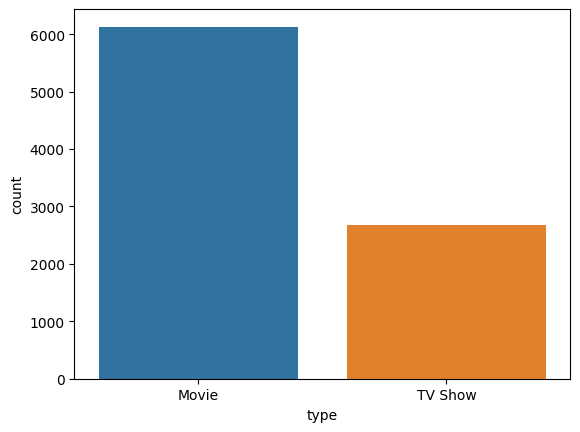

In [ ]:
# Create a count plot
sns.countplot(x=df["type"])

# Show the plot
plt.show()

In [ ]:
top_countries = df['country'].value_counts()[:10].to_frame(name='count')
top_countries

,count
United States,2818
India,972
United Kingdom,419
Japan,245
South Korea,199
Canada,181
Spain,145
France,124
Mexico,110
Egypt,106


In [ ]:
top_countries['count']

United States     2818
India              972
United Kingdom     419
Japan              245
South Korea        199
Canada             181
Spain              145
France             124
Mexico             110
Egypt              106
Name: count, dtype: int64

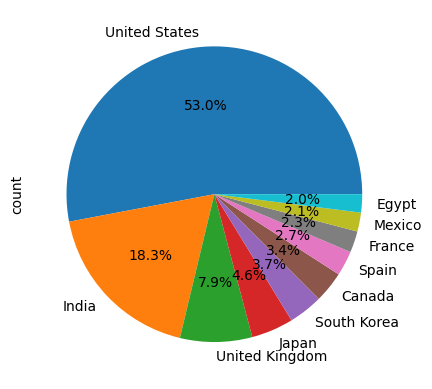

In [ ]:
top_countries_count = top_countries['count']
top_countries_count.plot.pie(autopct="%.1f%%")

In [ ]:
top_ratings = df['rating'].value_counts().to_frame(name='count')
top_ratings

,count
TV-MA,3207
TV-14,2160
TV-PG,863
R,799
PG-13,490
TV-Y7,334
TV-Y,307
PG,287
TV-G,220
NR,80


In [ ]:
top_ratings = df['rating'].value_counts()[:11].to_frame(name='count')
top_ratings

,count
TV-MA,3207
TV-14,2160
TV-PG,863
R,799
PG-13,490
TV-Y7,334
TV-Y,307
PG,287
TV-G,220
NR,80


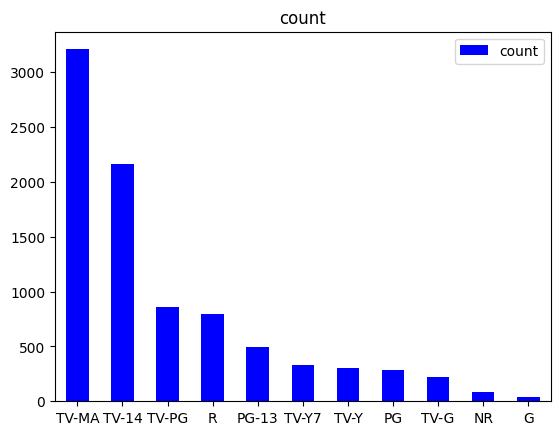

In [ ]:
axes = top_ratings.plot.bar(rot=0, subplots=True, color={"count": "blue"})


In [ ]:
content = df.groupby('release_year').count()['show_id'][-22:-1].to_frame(name="count")
content

,count
release_year,
2000,37
2001,45
2002,51
2003,61
2004,64
2005,80
2006,96
2007,88
2008,136


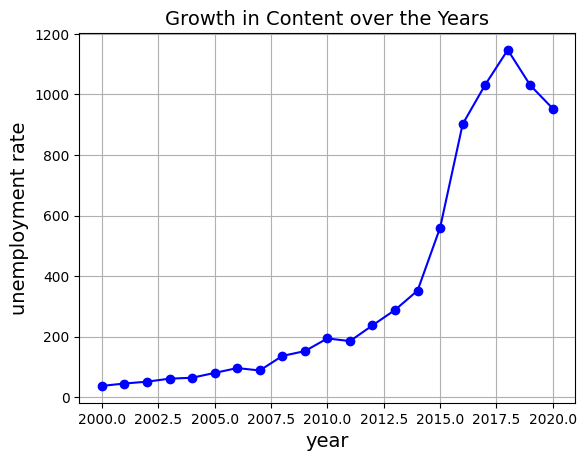

In [ ]:
plt.plot(content['count'], color='blue', marker='o')
plt.title('Growth in Content over the Years', fontsize=14)
plt.xlabel('year', fontsize=14)
plt.ylabel('unemployment rate', fontsize=14)
plt.grid(True)
plt.show()

In [ ]:
# Get the top 3 countries with the most movies and shows
top_n_countries = df.groupby('country').size().sort_values(ascending=False).head(20)
top_n_countries

country
United States                    2818
India                             972
United Kingdom                    419
Japan                             245
South Korea                       199
Canada                            181
Spain                             145
France                            124
Mexico                            110
Egypt                             106
Turkey                            105
Nigeria                            95
Australia                          87
Taiwan                             81
Indonesia                          79
Brazil                             77
United Kingdom, United States      75
Philippines                        75
United States, Canada              73
Germany                            67
dtype: int64

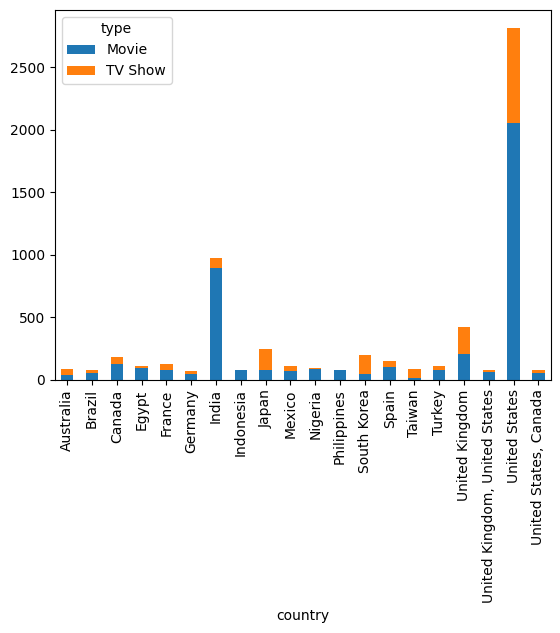

In [ ]:
# Get the top 3 countries with the most movies and shows
top_n_countries = df.groupby('country').size().sort_values(ascending=False).head(20)

# Subset the DataFrame to only include the top n countries
top_n_df = df[df['country'].isin(top_n_countries.index)]

# Group the DataFrame by type and country
grouped_df = top_n_df.groupby(['country', 'type']).size().unstack().plot(kind='bar', stacked=True)
